# Page Detection
And playing around with OpenCV

In [1]:
import os.path
import cv2 as cv
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cv.__version__

'4.1.1'

## Step 1: Reading in Images

In [3]:
def read_offset_csv(path):
    """
    Reads a CSV with book offsets and returns a pandas DataFrame of int8 values.
    The header are the IDs of the corresponding books.
    If pages are missing these are indicated by value -128 (min int8).
    """
    df = pd.read_csv(path, header=0, na_values=" ").fillna(-128).astype(np.int8)
    df.index = df.index + 1
    return df

In [4]:
shuuchin1 = read_offset_csv("annotations/shuuchinbukan-1.csv")

This is the raw offset table. With this one can get matching images.

**TODO** Convert offsets to the image path

In [5]:
shuuchin1

,200019525,200019527,200019533,200019538,200019541,200019543,200019545,200019548,200019550,200019552,200019556,200019558
1,-128,-128,-128,-128,-128,-128,-128,-128,-128,-128,-128,-128
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,0,0,0,0,0,0,0,0,0,0,0
151,0,0,0,0,0,0,0,-128,-128,-128,-128,-128
152,0,0,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0,0,0,0,0,0,0,0,0


These are two simple pages for comparion. They should be relatively easy.

It's page 5 of the bukan' with IDs *200019525* and *200019527*.

In [6]:
img1 = cv.imread("data/200019525/image/200019525_00005.jpg")
img2 = cv.imread("data/200019527/image/200019527_00005.jpg")

## Corner Detection

Doing some tutorials from <https://docs.opencv.org/4.1.1/db/d27/tutorial_py_table_of_contents_feature2d.html>.

In [7]:
def show_image(image, figsize=(18, 18)):
    plt.figure(figsize=figsize)
    plt.imshow(image, cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.show()

### Harris Corner Detection

<https://docs.opencv.org/4.1.1/dc/d0d/tutorial_py_features_harris.html>

In [8]:
def harris_corner_detection(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    corners = cv.cornerHarris(gray, 15, 3, 0.04)
    corners = cv.dilate(corners, None)
    color = img.copy()
    color[corners > 0.09 * corners.max()] = [255, 0, 0]
    return color

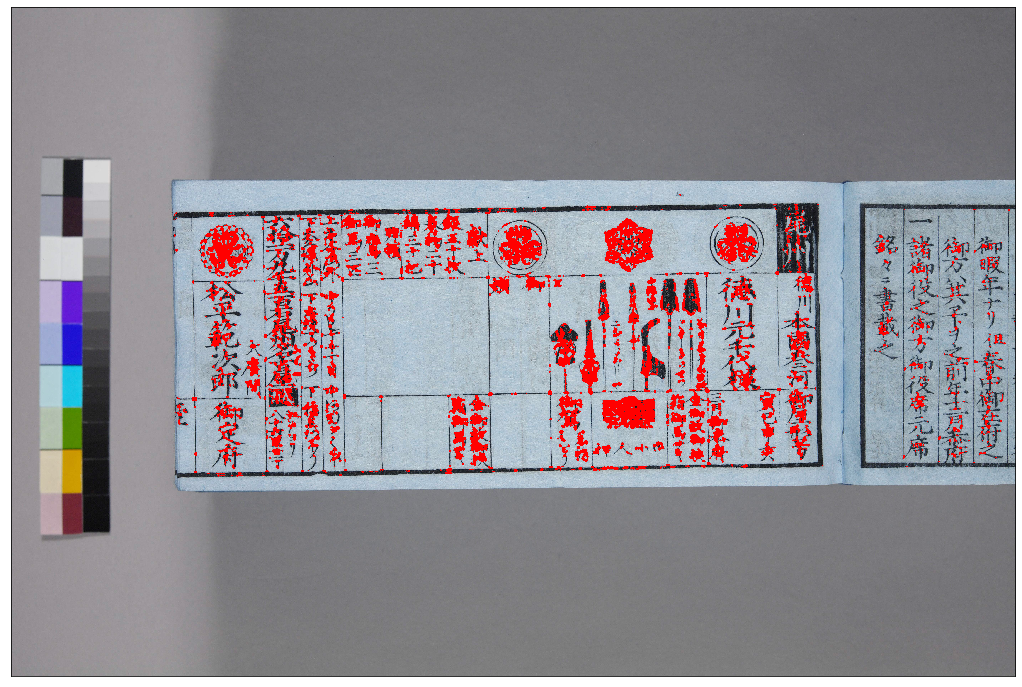

In [9]:
show_image(harris_corner_detection(img1))

Result: These are lots of corners. It doesn't make sense to track all of them. But might just be a thresholding problem.

Let's take a look at the improved algorithms.

### Shi-Tomasi Corner Detector (Good Features to Track)

<https://docs.opencv.org/4.1.1/d4/d8c/tutorial_py_shi_tomasi.html>

In [10]:
def shi_thomasi_corner_detection(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    corners = cv.goodFeaturesToTrack(gray, 25, 0.01, 10)
    corners = np.int0(corners)
    color = img.copy()
    for i in corners:
        x, y = i.ravel()
        cv.circle(color, (x, y), 20, [255, 0, 0], cv.FILLED)
    return color

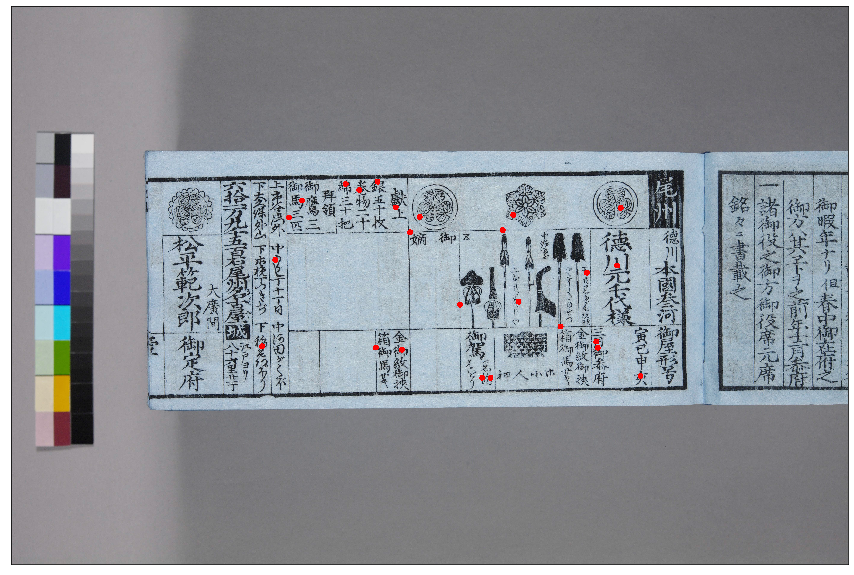

In [11]:
show_image(shi_thomasi_corner_detection(img1), (15, 15))

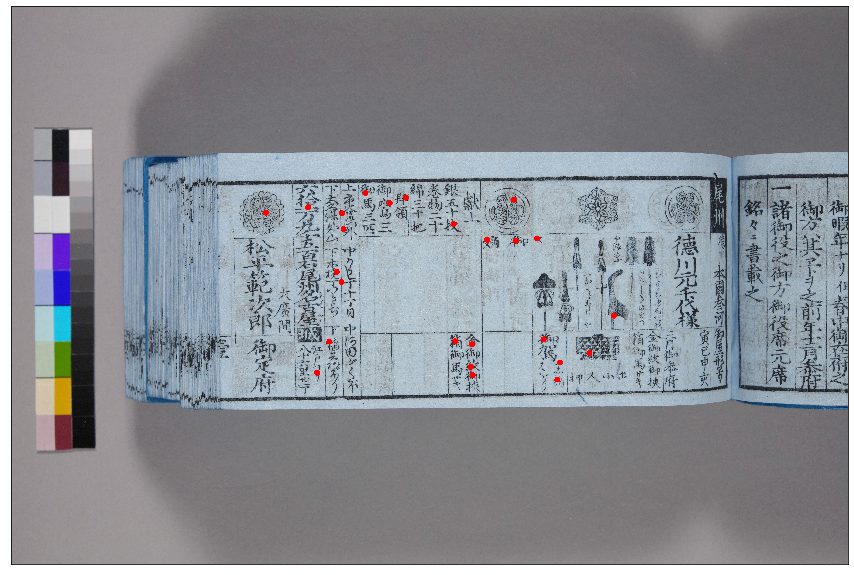

In [12]:
show_image(shi_thomasi_corner_detection(img2), (15, 15))

Result: These are some nice and simple features. But they don't really match, do they? Even though I used the same parameters.

Might be better for *tracking*.